# Time Series Analysis

‘Time’ is the most important factor which ensures success in a business. It’s difficult to keep up with the pace of time.  But, technology has developed some powerful methods using which we can ‘see things’ ahead of time. 


## Description of the Project

- This project was found on Analytics Vidhya and the goal of the project is to study various techniques of time series decomposition and time series forecasting.

- The object of the study is to guide the investment decision for investor who is considering to make an investment in a new form of transportation - JetRail which uses jet propulsion technology to run rails and move people at a high speed.

- The investment would only make sense if JetRail is able to get increasing amount of users in the future. So, the study is to develop a time series analysis on traffic data of JetRail and make a final prediction on the future traffic.

- The dataset contains ID of the observation point, count of passenger, and datetime.

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

## Hypothesis Generation

Hypothesis generation is done before having a look at the data in order to avoid any bias that may result aftre the observation.

The possible hypothesis may affect the passenger count (dependent varible for this case study) on the JetRail:

- There will be an increase in the traffic as the years pass by, which is the nature of upward population growth trend.
- There will be seasonal factors, such as more traffic will likely to be high from May to October (many people take vacation around this time range) and there will likely be more traffic on weekdays than weekends.
- Traffic during the peak hours will likely to be high

In [128]:
train=pd.read_csv(r'...Train_SU63ISt.csv')
test=pd.read_csv(r'...Test_0qrQsBZ.csv')

In [129]:
# create copies of the original dataset so we do not lose the original dataset
train_original=train.copy()
test_original=test.copy()

## Explore the Dataset

- Id is the number of each observation point
- Datetime is the time of each observation
- Count is the passenger count corresponding to each Datetime

In [4]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object,
 ID           int64
 Datetime    object
 dtype: object)

In [6]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [94]:
train

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...,...,...
2014-09-25 19:00:00,18283,2014-09-25 19:00:00,868,2014,9,25,19,3,0
2014-09-25 20:00:00,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0
2014-09-25 21:00:00,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0


## Feature Extraction

In [130]:
# turn datetime to date format
train['Datetime']=pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime']=pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')

test_original['Datetime']= pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M' )
train_original['Datetime']= pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M' )

In [131]:
# Extract year, month, day and hour to see wether the original hypothesis is valid

for i in (train, test,test_original,train_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour


In [132]:
train['day of week']=train['Datetime'].dt.dayofweek
temp=train['Datetime']

In [133]:
# extract the day of week 
# values of 5 and 6 represent weekend
def applyer(row):
    if row.dayofweek==5 or row.dayofweek ==6:
        return 1
    else:
        return 0

In [134]:
temp2=train['Datetime'].apply(applyer)
train['weekend']=temp2

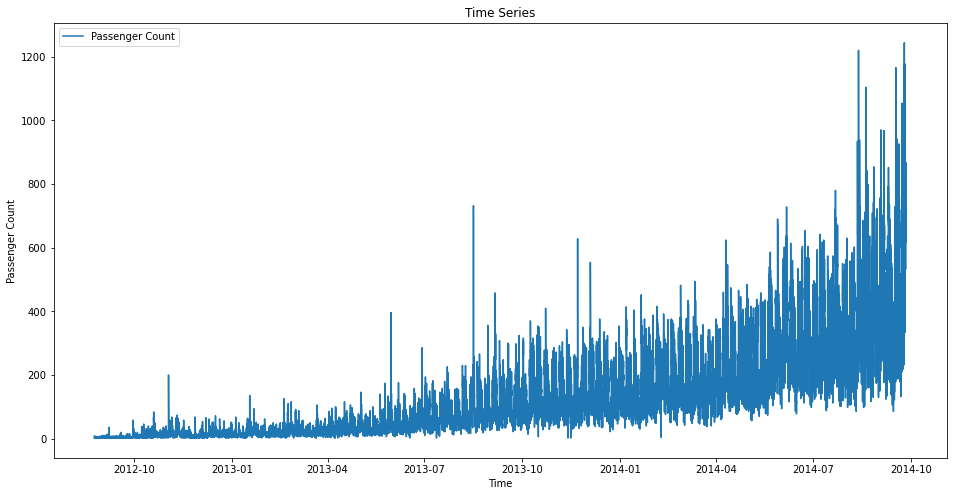

In [135]:
train.index=train['Datetime'] # indexing the datetime to get the time period on the x-axis
df=train.drop('ID',1) # drop ID to get only the datetime on x-axis
ts=df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts,label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time")
plt.ylabel("Passenger Count")
plt.legend(loc='best')

There is a upward trend in the series (the number of count is increasing over time). Also, there is a sudden increase in the number of counts and there may be some events that causes the sudden increase of passengers on particular days.

## Exploretory Analysis 
The possible hypothesis we have made earlier:

- There will be an increase in the traffic as the years pass by, which is the nature of upward population growth trend.
- There will be seasonal factors, such as more traffic will likely to be high from May to October (many people take vacation around this time range) and there will likely be more traffic on weekdays than weekends.
- Traffic during the peak hours will likely to be high

Let's explore each hypothesis

<AxesSubplot:xlabel='year'>

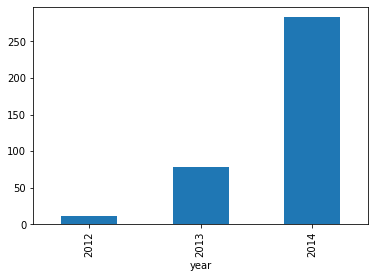

In [13]:
train.groupby('year')['Count'].mean().plot.bar()

There is exponential growth in the traffic with respect to year which validate our hypothesis.

<AxesSubplot:xlabel='month'>

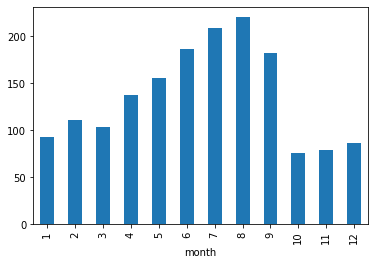

In [14]:
train.groupby('month')['Count'].mean().plot.bar()

There is a decrease in the mean of passenger count in last 3 months. It is worth investigating further.

<AxesSubplot:title={'center':'Passenger Count (Monthwise)'}, xlabel='year,month'>

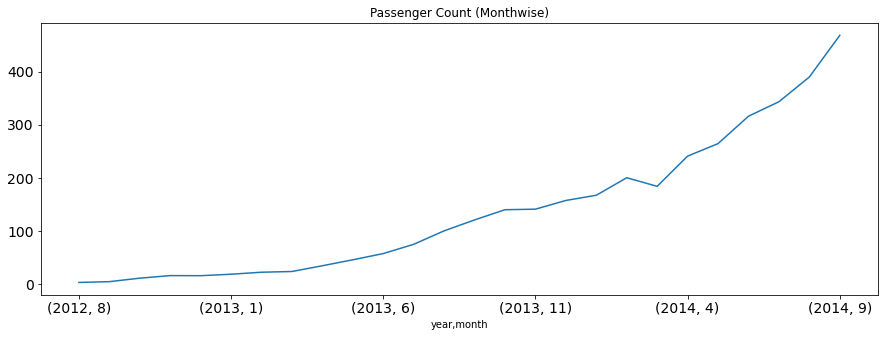

In [15]:
temp=train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5), title='Passenger Count (Monthwise)', fontsize=14)

- We see that the months 10, 11, 12 are not present for year 2014 in dataset
- The mean of months 10, 11, 12 are pretty low in 2012
- Since there is an increasing trend in time series, the mean value for the rest of the months will be more due to larger passenger count in year 2014 and we will get smaller value for months 10, 11, 12

<AxesSubplot:xlabel='day'>

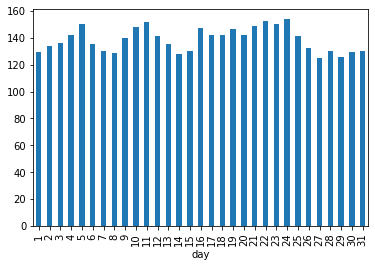

In [16]:
train.groupby('day')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='Hour'>

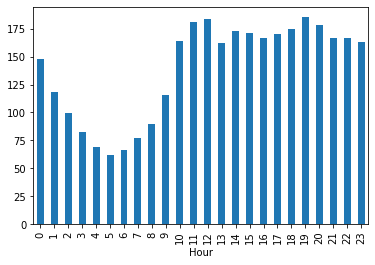

In [17]:
train.groupby('Hour')['Count'].mean().plot.bar()

- Not much information from daywise trend
- There is a peak traffic starting from 7:00
- The traffic starts decease from 23:00 to 5:00.



<AxesSubplot:xlabel='weekend'>

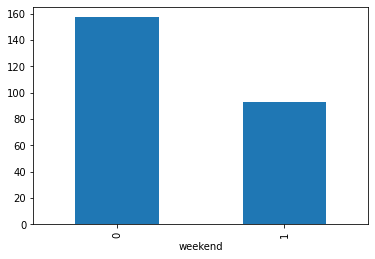

In [18]:
train.groupby('weekend')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='day of week'>

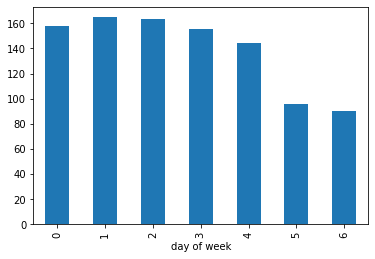

In [19]:
train.groupby('day of week')['Count'].mean().plot.bar()

- Passenger count is less for Saturday and Sunday compared with other days of the week.

- There is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and easier for a model to learn.

In [136]:
train=train.drop('ID',1)

In [137]:
train.Timestamp=pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index=train.Timestamp
hourly=train.resample('H').mean()
daily=train.resample('D').mean()
weekly=train.resample('W').mean()
monthly=train.resample('M').mean()

<AxesSubplot:title={'center':'monthly'}, xlabel='Datetime'>

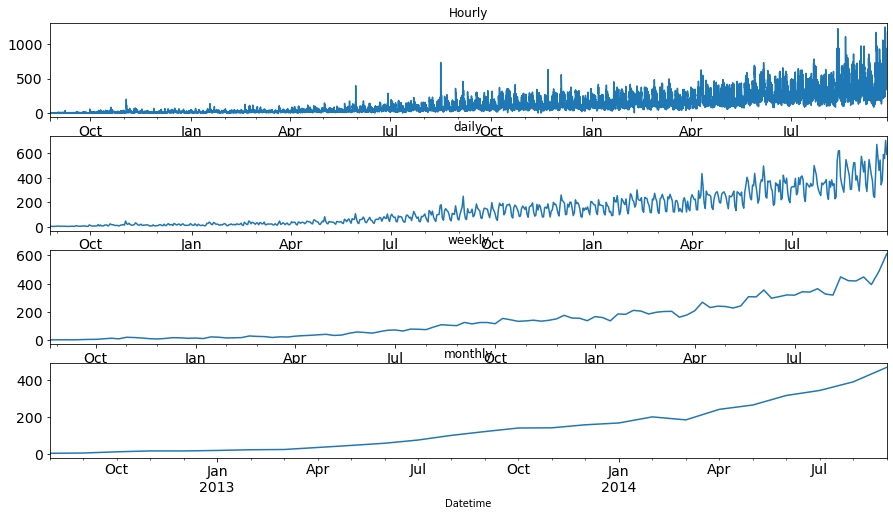

In [138]:
fig, axs=plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title='Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title='daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title='weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title='monthly', fontsize=14, ax=axs[3])

- We can see that the time series is becoming more and more stable when we are aggreagating it on daily, weekly and monthly basis.

- But it would be difficult to convert the monthly and weekly prediction to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly prediction, which will become very expanded process. So, we will work on the daily time series,

In [139]:
test.Timestamp=pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index=test.Timestamp

In [140]:
test=test.resample('D').mean()

In [141]:
train.Timestamp=pd.to_datetime(train.Datetime,  format='%d-%m-%Y %H:%M')
train.index=train.Timestamp

In [142]:
train=train.resample('D').mean()

# Modeling Techniques

## Splitting the data into training and validation part

- To divide the data into training and validation set, we will take last 3 months as the validation data and rest for training data. We will take only 3 months as the trend will be the most in them. Also, since we have 25 months duration, taking more than 3 months for the validation set would give us less data point in the training set, so it will be a good choice to take 3 months for validation set.

- The starting date of the dataset is 25-08-2012 as we have in the exploration part and the end date is 25-09-2014.
the reason we do not randomly split the train and valid dataset is: if we choose the split randomly it will take some values from the starting and some from the last years as well. It is similar to predicting the old values based on the futures values which is not the case in real scenario. So, this kind of split is used while working with time related peoblems.

In [143]:
Train=train.loc ['2012-08-25':'2014-06-24']
valid=train.loc ['2014-06-25':'2014-09-25']

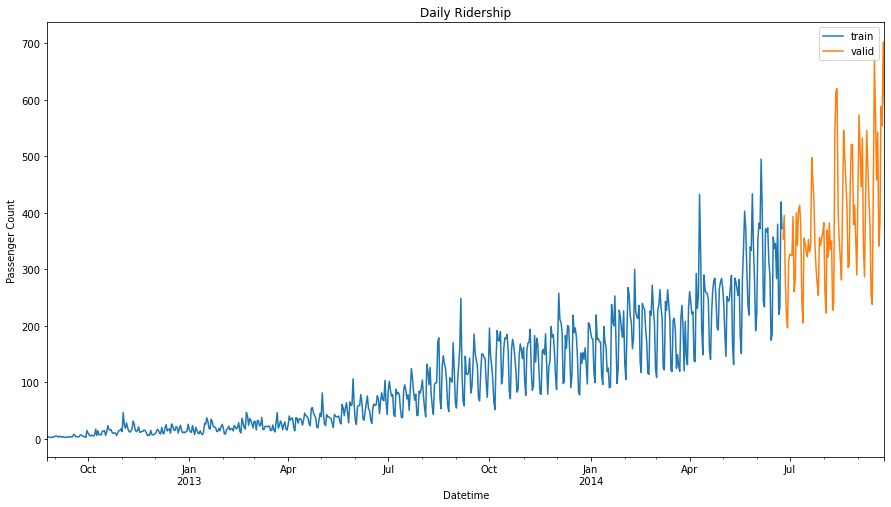

In [144]:
Train.Count.plot(figsize=(15,8), title='Daily Ridership', label='train')
valid.Count.plot(figsize=(15,8), title='Daily Ridership', label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger Count")
plt.legend(loc='best')
plt.show()

- Here the blue part represents the train data and the orange part represents the validation data.
we will look at various models to forcast the time series.

## i) Naive Approach
In this method, we assume that the next expected point is euqal to the last observed point. So we can expect a straight horizontal line as the prediction.

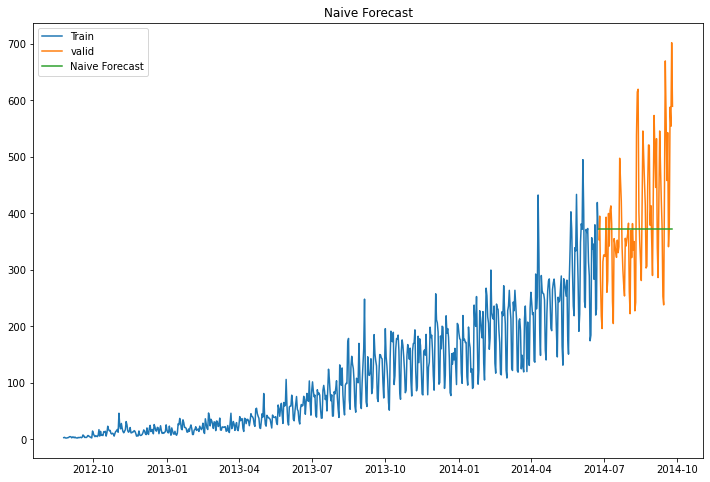

In [104]:
dd=np.asarray(Train.Count)
y_hat=valid.copy()
y_hat['naive']=dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='valid')
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

- We can calculate how accurate our predictions are using Root Mean Square Error
- rmse is the standard deviation of the residuals
- Residuals are a measure of how far from the regression line data points are

In [105]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms=sqrt(mean_squared_error(valid.Count,y_hat.naive))
print(rms)

111.79050467496724


## ii) Moving Average
- In this technique we will take the average of the passenger count for last few time periods only.

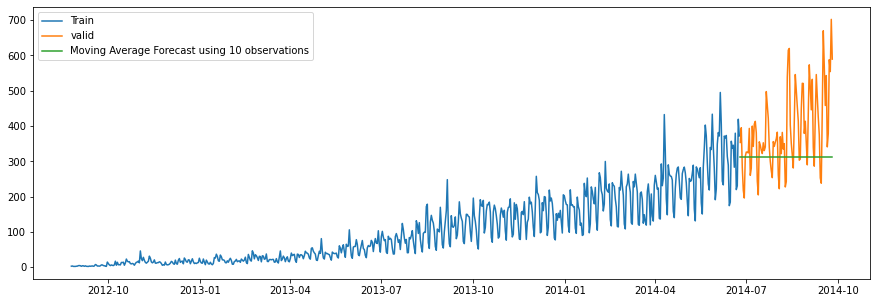

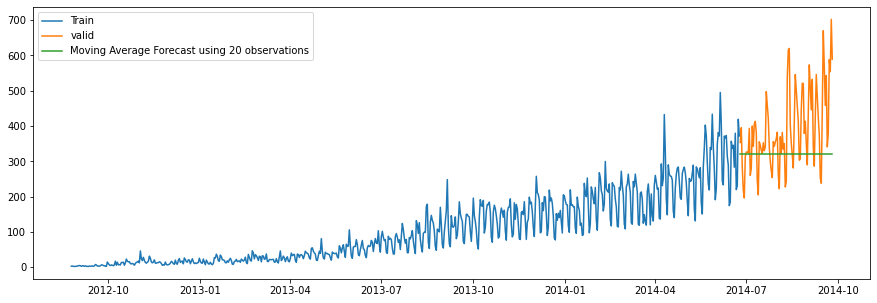

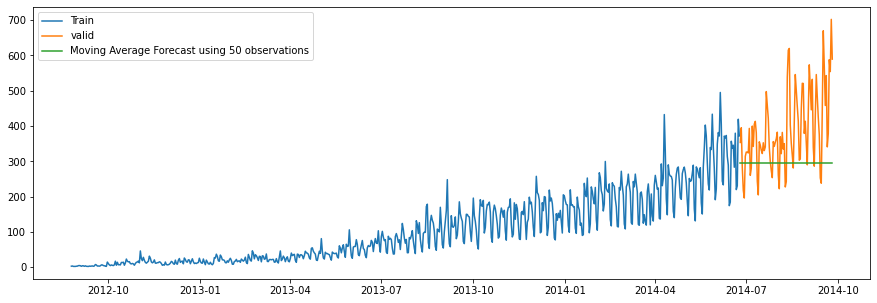

In [108]:
y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 obervation
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()


y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 obervation
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()

y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 obervation
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [107]:
rms=sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
print(rms)

144.19175679986793


- We took the average of the last 10, 20 and 50 observations and predicted based on that. We can see that the predictions are getting weaker as we increase the number of obervations.


## iii) Simple Exponential Smoothing

- In this method, we assign larger weights to more recent observation than to observations from the distant past
- The weights decrease exponentially as obervations come from further in the past, the smallest weights are associated with oldest observations

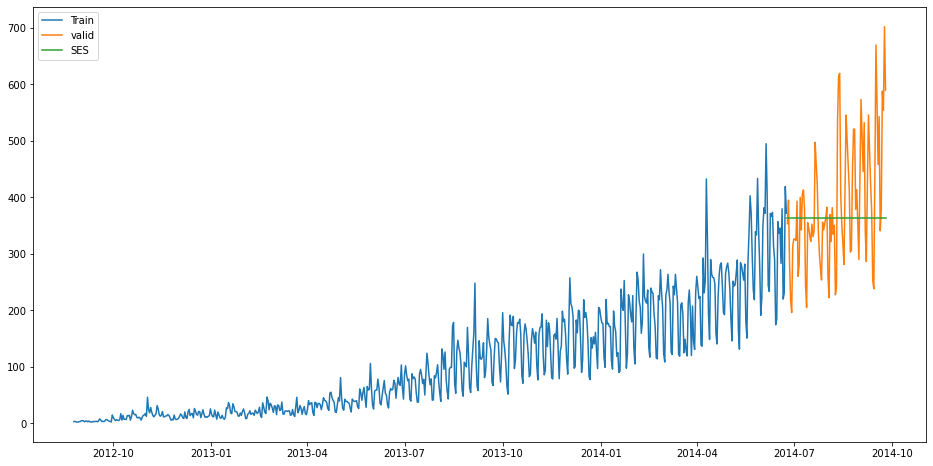

In [31]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt

y_hat_avg=valid.copy()
fit=SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6, optimized=False)
y_hat_avg['SES']=fit.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='valid')
plt.plot(y_hat_avg['SES'],label='SES')
plt.legend(loc='best')
plt.show()

In [32]:
rms=sqrt(mean_squared_error(valid.Count,y_hat_avg.SES))
print(rms)

113.43708111884514


- We can infer that the fit of the model has not improved. If we give the entire weight to the last oberserved value only, this method will be similar to the naive approach. So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.

## iv) Holt's Linear Trend Model
- It is an extention of simple exponential smoothing to allow forecasting of data with a trend
- This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

The decomposition of the time series:
- Obderved, which is the original time series
- Trend, which shows the trend in the time series, saying, increase or decreasing behavior of the time series
- Seasonal, which tells us about the seasonality in the time series
- Redidual, which is obstained by removing any trend or seasonality in the time series

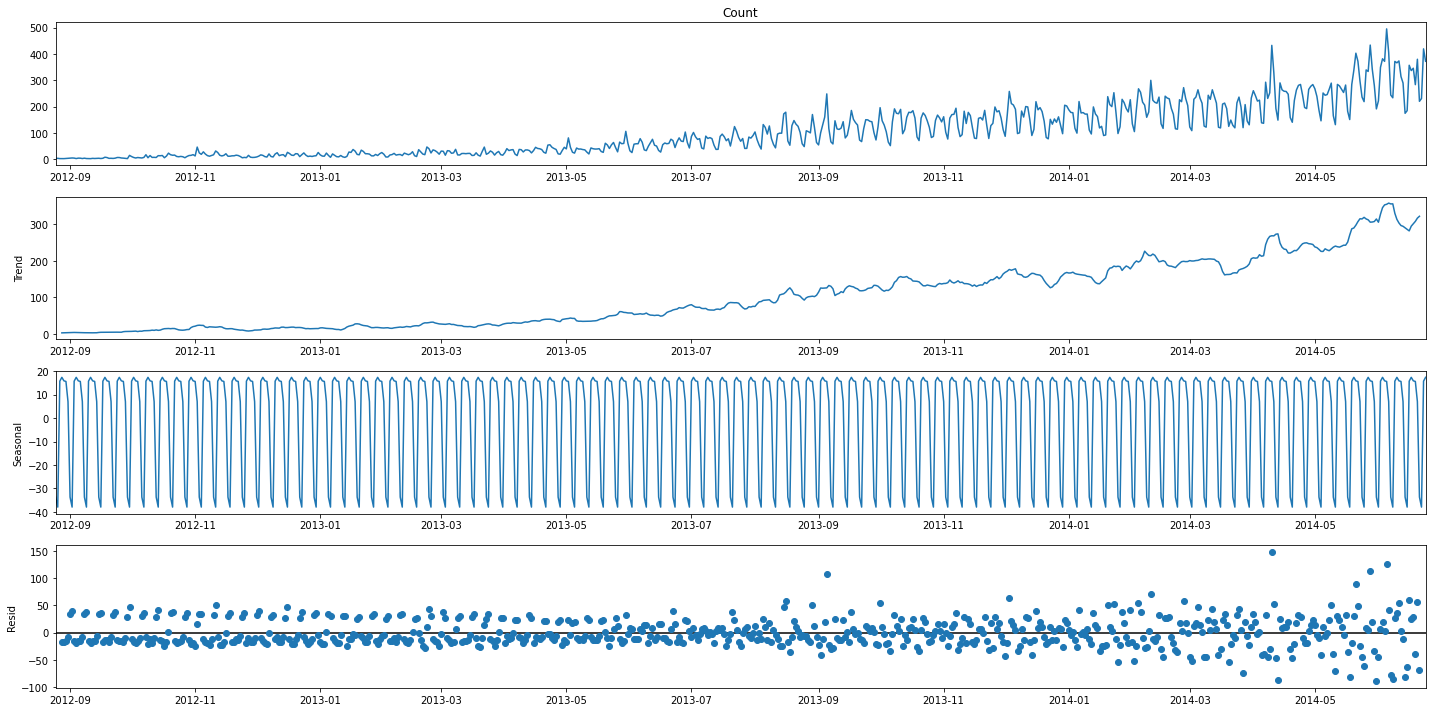

In [145]:
import statsmodels.api  as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result=sm.tsa.stattools.adfuller(train.Count)
plt.show()

- We can see that there is a increasing trend in the dataset, so we will make a model based on the trend.

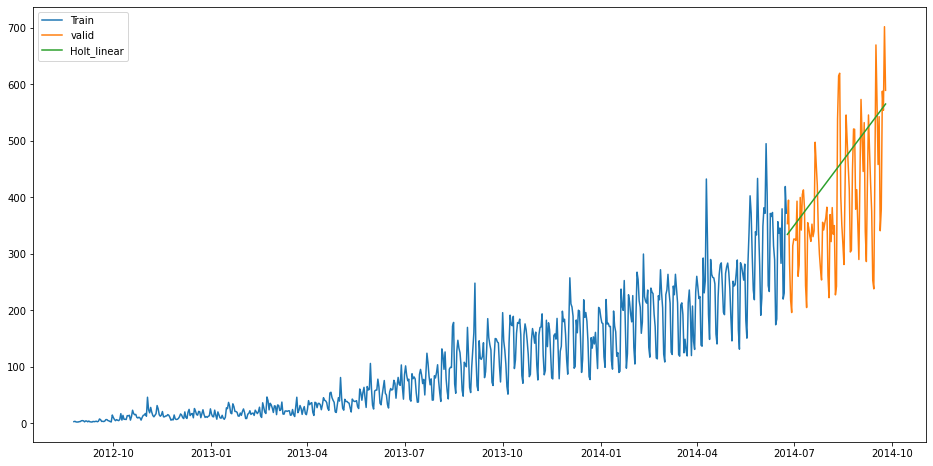

In [146]:
y_hat_avg=valid.copy()
fit1=Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg['Holt_linear']=fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='valid')
plt.plot(y_hat_avg['Holt_linear'],label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [147]:
rms=sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_linear))
print(rms)

112.94278345314041


- We can see an inclined line here as the model has taken into consideration the trend of the time series. The rmse value has decreased slightly, comparing with the rmse of exponential smoothing method.

## Holt's Linear Trend Model on Daily Time Series
- New let's try to make holt's linear trend model on the daily time series and make prediction on the test dataset
- We will make the prediction on the daily time series and then will distribute that daily prediction to hourly predictions

### To convert prediction to hourly basis:
- First calculate the ratio of passenger count for each hour of every day
- Find the average ratio of passenger count for evey hour and get 24 ratios
- Calculate the hourly prediction by multiply the daily prediction with the hourly ratio

In [148]:
submission=pd.read_csv(r'...sample_submission_LSeus50.csv')
submission # we need onlt ID and corresponding count for the final submission

,ID,Count
0,18288,0
1,18289,0
2,18290,0
3,18291,0
4,18292,0
...,...,...
5107,23395,0
5108,23396,0
5109,23397,0
5110,23398,0


In [149]:
predict=fit1.forecast(len(test))
test['prediction']=predict

In [181]:
# calculate hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum()

In [182]:
temp=train_original.groupby(['Hour'])['ratio'].sum()

In [183]:
# group the hourly ratio
pd.DataFrame(temp, columns=['Hour', 'ratio']).to_csv('Groupby.csv')

In [184]:
temp2=pd.read_csv(r'C:\\Users\\ll3371\\Desktop\\New folder\\Groupby.csv')


In [186]:
merge=pd.merge(test,test_original, on=('day', 'month', 'year'), how='left')


In [187]:
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year','month', 'Datetime', 'Hour_x', 'Hour_y'],axis=1)
prediction=pd.merge(merge,temp2,on='Hour' ,how='left')

# ARIMA Model
- ARIMA stands for Auto Regression Intergrated Moving Average. It is specified by three ordered parameters (p,d,q)
- p: is the order of the autoregressive model (number of time lags)
- d: os the degree of diffrencing (number of times the data hve had past values substracted)
- q: is the order of moving average model. 
- The ARIMA forecasting for a stationaly time series is nothing but a linear (like a linear regression) equation

## Stationary Time Series
- We make the series stationary to make the variables independent. Variables can be dependent in various ways, but can only be indenpendent in one way. So, we will get more information when they are independent. Hence the time series must be stationary.

- There are three basic criterion for a series to be classfied as stationary series:

- The mean of the time series should not be a function of time. It should be constant
- The variance of the time series should not be a function of time
- The covariance of the ith term and the (i+m)th term should not be a function of time


# Stationarity Check
- Use Dickey Fuller test to check the stationarity of the series to see how strongly a time series is defined by a trend

- The null hypothesis of the test is that time series is not stationary (has some time-dependent structure)

- The alternate hypothesis is that the time series is stationary
- The test resuls comprise of a Test Statistic and some Critical Values for diffrence confidence levels.
- If the Test Statistic is smaller than Critical Values, we can reject the null hypothesis (stationary)

## Trend
- First, remove the trend in the dataset as we can see clearly that there is a increasing trend in the dataset and it may result less accurate result for the test.
- We will take rolling average here to remove the trend. Based on the fact that each day has 24 hours, we will take the window size of 24.

- We can apply transformation which penalizes higher values more than smaller ones, for example, taking log transformation, to stabilise the variance of a time series
- We will take rolling average to remove trend. We will take the window size of 24 based on the fact that each day has 24 hours
- Futher, diffrencing can help to make the series stable and aliminate the trend (can help to stabilise the mean of a time series)

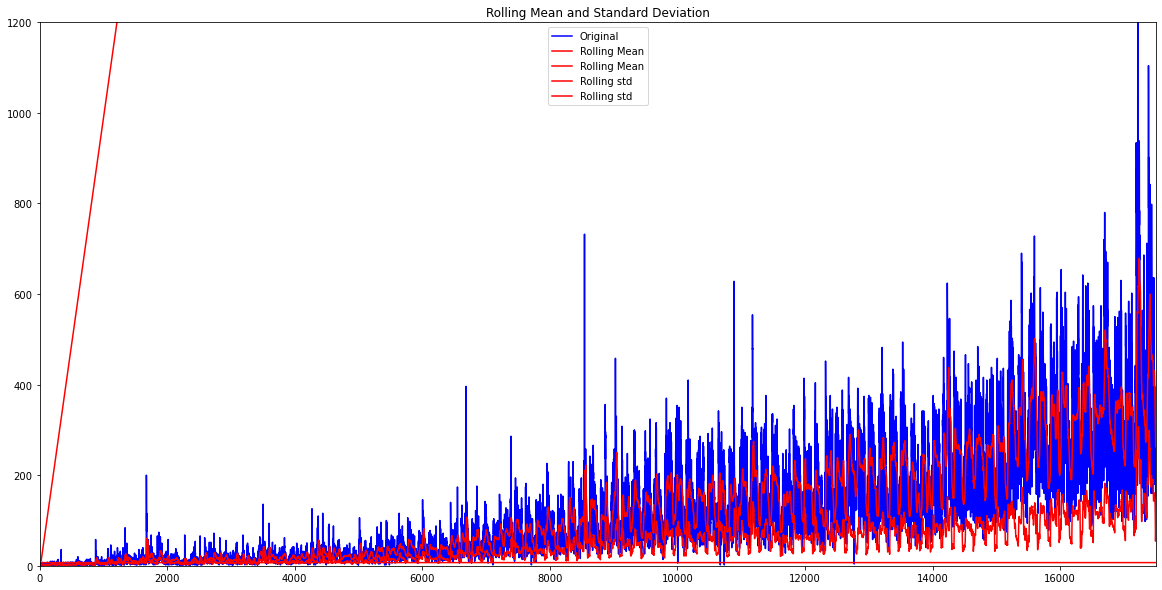

Result of Dickey-Fuller Test:
Test Statistic             -4.456561
p-value                     0.000235
# logs used                45.000000
# of obervation used    18242.000000
Critical Value (1%)        -3.430709
Critical Value (5%)        -2.861698
Critical Value (10%)       -2.566854
dtype: float64


In [155]:
# Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean=train_og.rolling(24).mean()
    rolstd=train_og.rolling(24).std()
    
    orig=plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(rolmean,color='red', label='Rolling Mean')
    std=plt.plot(rolstd,color='red', label='Rolling std')
    
    plt.xlim(0, 17500)
    plt.ylim(0, 1200)
    
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print('Result of Dickey-Fuller Test:')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '# logs used', '# of obervation used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
test_stationarity(train_original['Count'])

In [37]:
# ADF Test
result = adfuller(train_og['Count'], autolag='AIC')


print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.456561
p-value: 0.000235
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


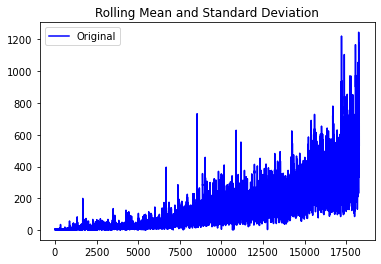

In [38]:
orig=plt.plot(train_og['Count'], color='blue', label='Original')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

## Note
The statistics shows that the tiem series is stationary as test statistic>critical value and p-value <0.05. But we can see an increasing trend in the data. So, we need to make the data more stationary by removing the trend and seasonality from the data.

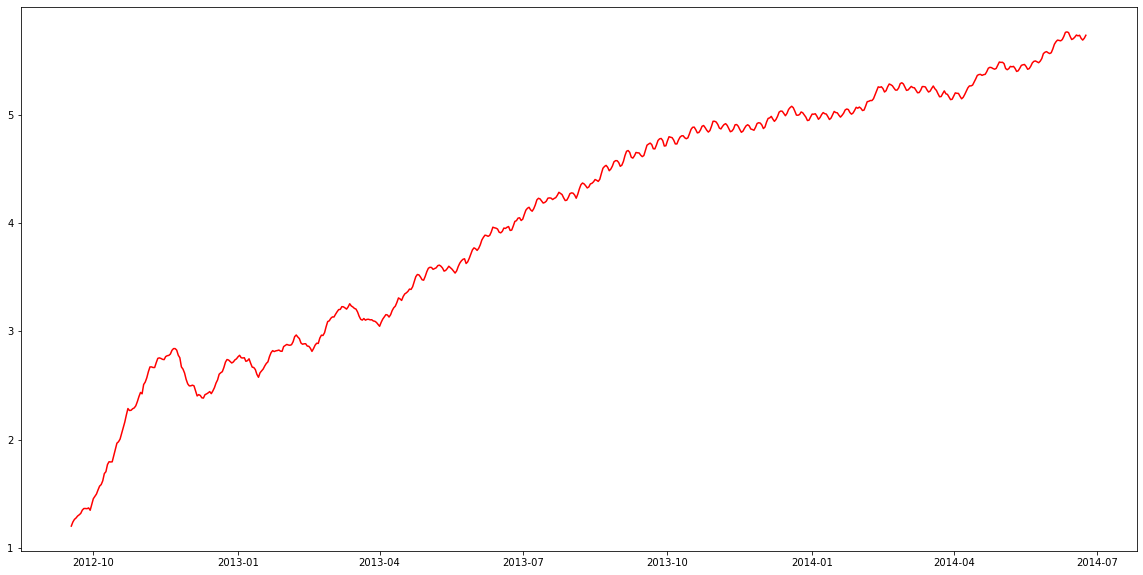

In [156]:
Train_log=np.log(Train['Count'])
valid_log=np.log(valid['Count'])
moving_avg=Train_log.rolling(24).mean()
plt.plot(moving_avg, color='red')
plt.show()

In [157]:
train_log_moving_avg_diff=Train_log - moving_avg

In [158]:
# since we took the average of 24 values, rolling mean is not defined for the first 23 values
train_log_moving_avg_diff.dropna(inplace=True) 

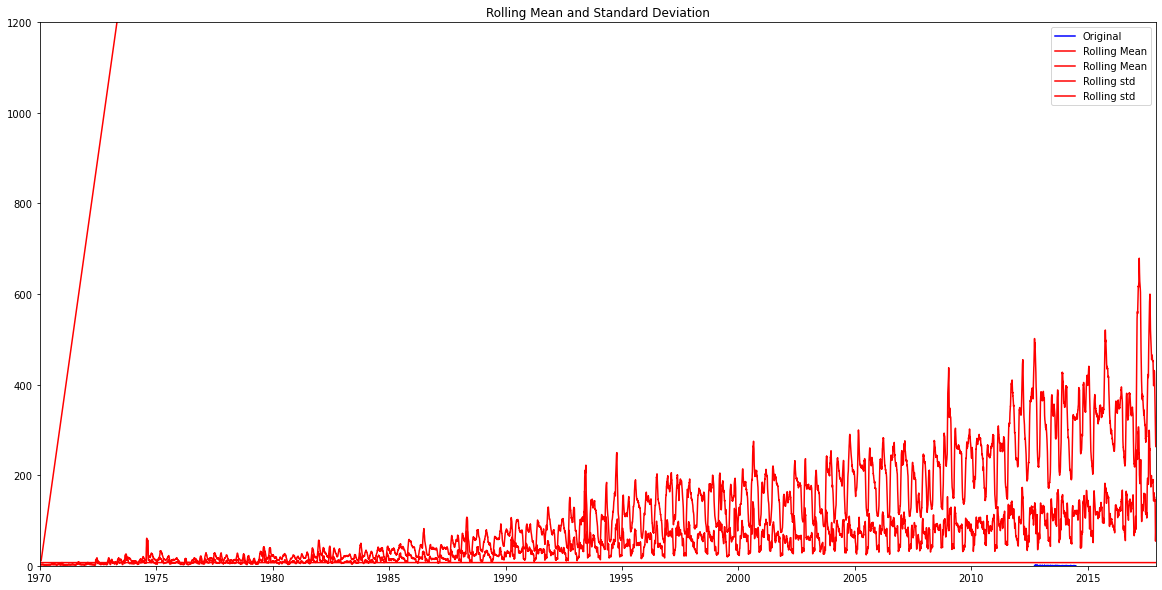

Result of Dickey-Fuller Test:
Test Statistic         -5.861646e+00
p-value                 3.399422e-07
# logs used             2.000000e+01
# of obervation used    6.250000e+02
Critical Value (1%)    -3.440856e+00
Critical Value (5%)    -2.866175e+00
Critical Value (10%)   -2.569239e+00
dtype: float64


In [159]:
test_stationarity(train_log_moving_avg_diff)

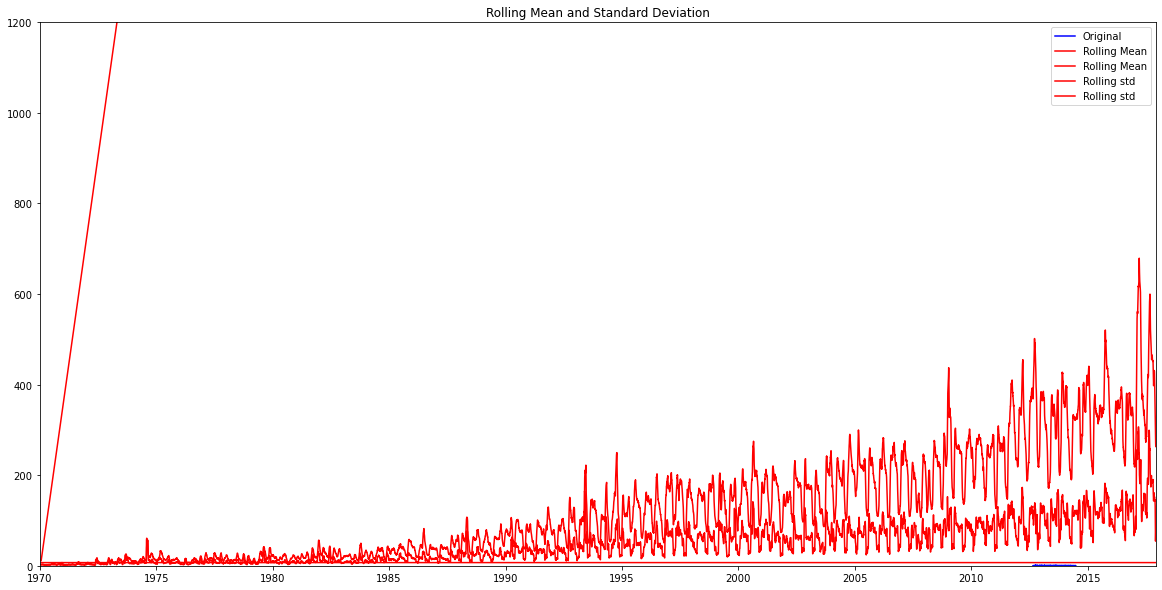

Result of Dickey-Fuller Test:
Test Statistic         -8.237568e+00
p-value                 5.834049e-13
# logs used             1.900000e+01
# of obervation used    6.480000e+02
Critical Value (1%)    -3.440482e+00
Critical Value (5%)    -2.866011e+00
Critical Value (10%)   -2.569151e+00
dtype: float64


In [160]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
# Diffrencing can help to make the series stable and eliminate the trend
Train_log_diff=Train_log - Train_log.shift(1)
test_stationarity(Train_log_diff.dropna())

The test statstics is very smaller compared to the critical value, so we can be confident that the trend is almost removed.

## Seasonality
Now we will decompose the time series into trend and seasonality and will get the residual which is the random variation in the series.

- By seasonality, we mean periodic fluctuations. A seasonal pattern exists when time series is influenced by seasonal factors (e.g., the quarter of the year, month, or day of the week)
- Seasonality is always of a fixed and known period
- Seasonal decompose can decompose the time series into trend, seasonality and residual


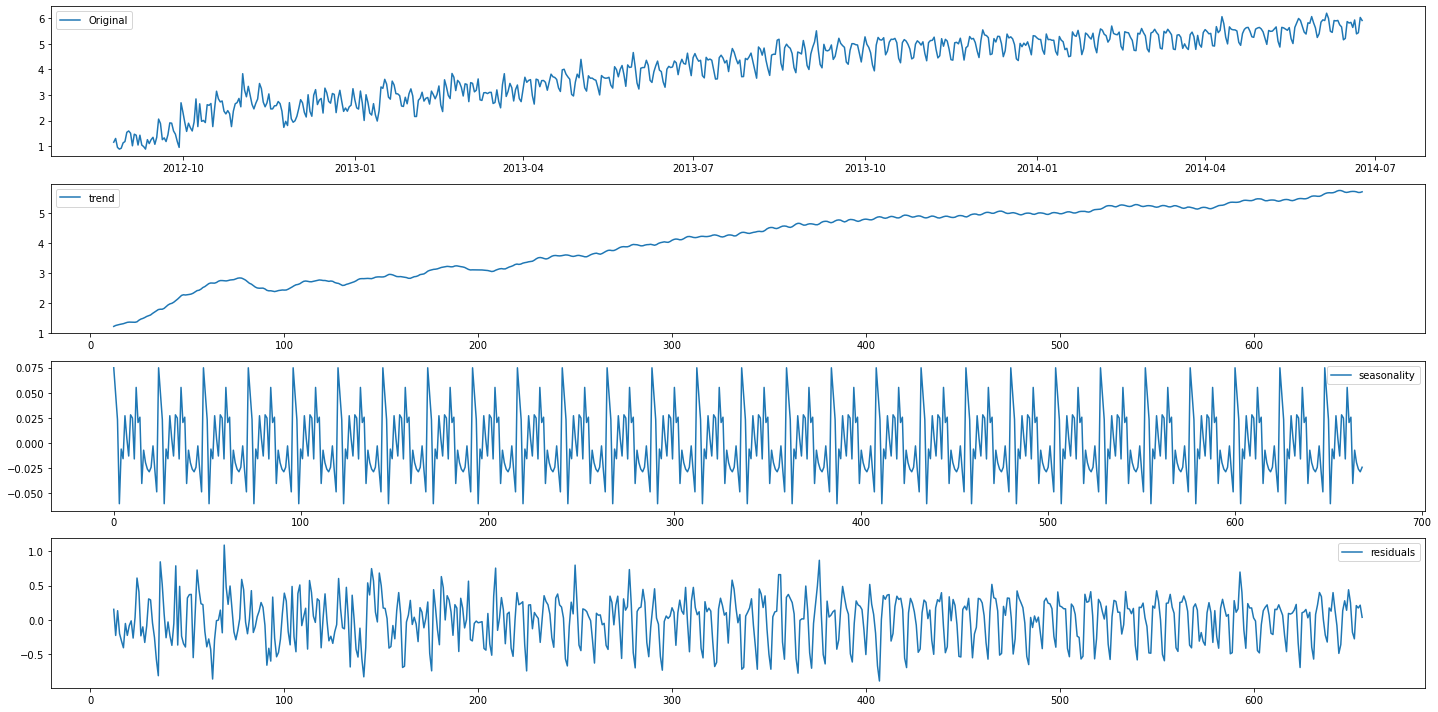

In [161]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition= seasonal_decompose(pd.DataFrame(Train_log).Count.values,freq=24)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(Train_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We can see the trend, residual and the seasonality clearly in the above graph. Seasonality shows a sonstant trend in counter, so we can be sure that this is not caused by the cyclic factor as a cycle occurs when the data exhibit rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”.

## Residuals

The residual is what is left. This kind of pattern cannot be ascribed to the trend component (the former moves too fast) or the seasonal component (the former does not obey seasonal timing).

Residuals are useful in checking whether a model has adequately captured the information in the data. A good forecasting method will yield residuals with the following properties:

- The residuals are uncorrelated. If there are correlations between residuals, then there is - information left in the residuals which should be used in computing forecasts.
- The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.

In [45]:
train_log_decompose=pd.DataFrame(residual)
train_log_decompose['date']=Train_log.index
train_log_decompose.dropna(inplace=True)
train_log_decompose.set_index('date',inplace=True)

# ADF Test
result = adfuller(train_og['Count'], autolag='AIC')


print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.456561
p-value: 0.000235
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


# ARIMA Forecasting

- First we need to find the optimized values for the p,d,q parameters using ACE (Autocorrelation Function) and PACF (Partial Autocorrelation Function) graph
- ACF is a measure of the corrlation between the timeseries with a lagged version of itself
- PACF measures the correlation between the timeseries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisions

In [162]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf=acf(Train_log_diff.dropna(),nlags=25)
lag_pacf=pacf(Train_log_diff.dropna(),nlags=252,method='ols')

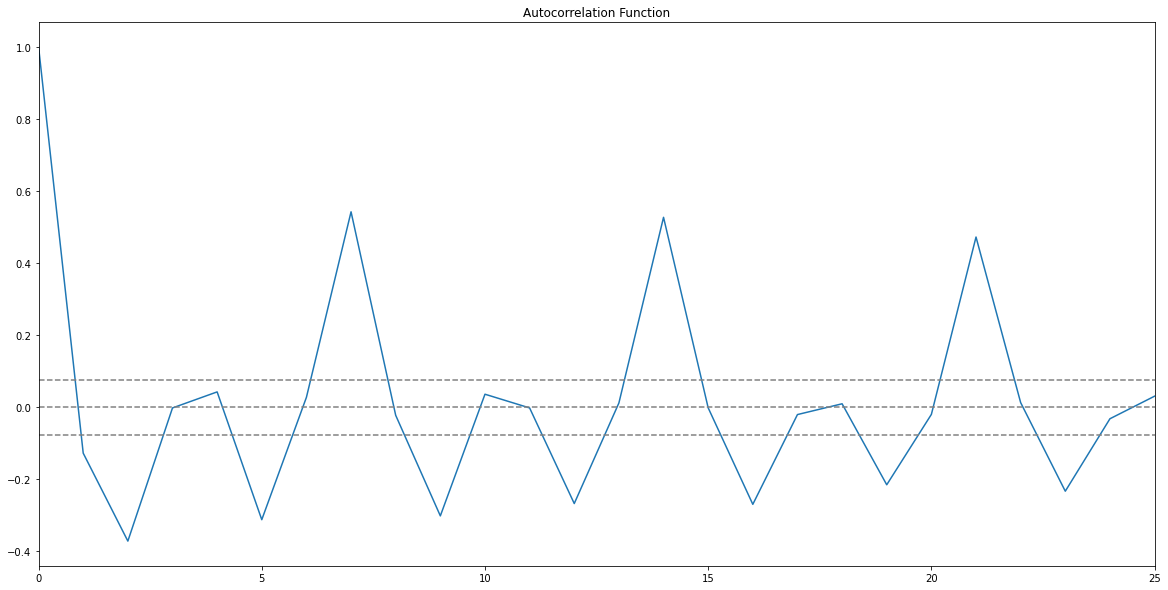

In [165]:
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlim(0, 25)
plt.show()


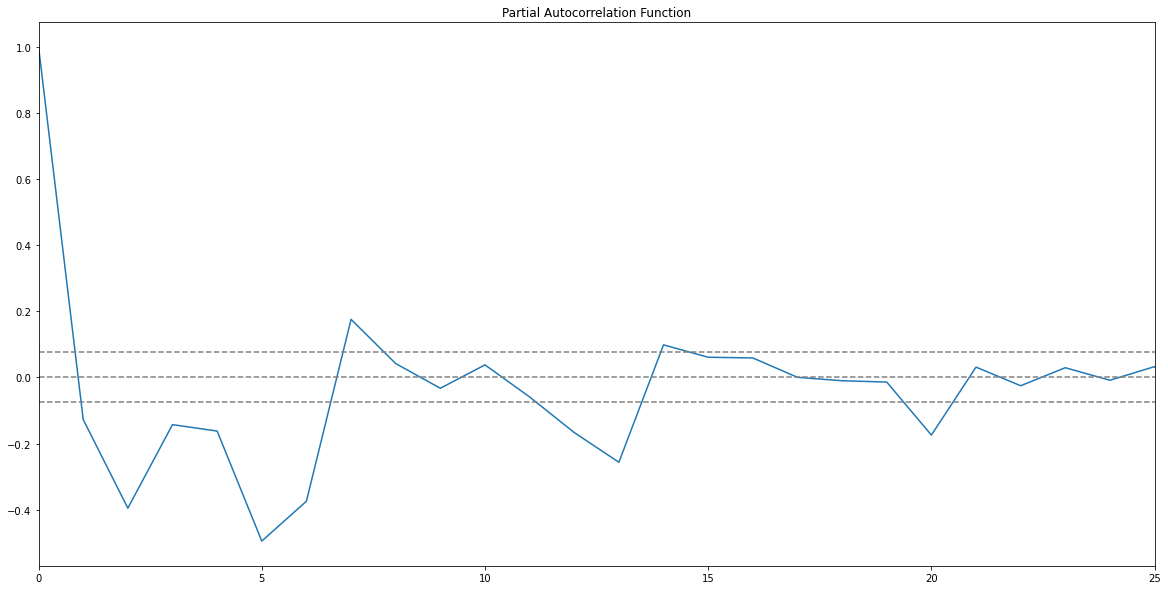

In [166]:
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(Train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlim(0, 25)
plt.show()

- p value is the lag value where the PACF chart crossed the upper confidence interval for the first time. It can be noticed that in this case p=2
- q value is the lag value where ACF chart crossed the upper confidence interval for the first time. It can be noticed that in this case q=2
- We will make the AR and MA model seperately and then combine them together

## AR Model

The autoregressive model specifies that the output variable depends linearly on its own previous values.

In [167]:
from statsmodels.tsa.arima_model import ARIMA

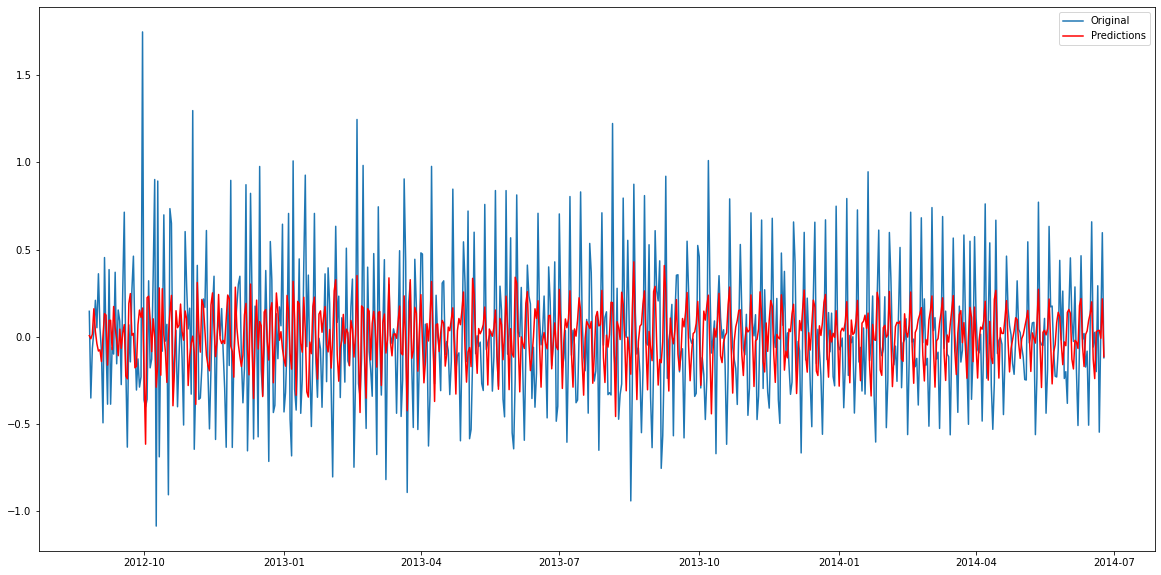

In [168]:
model=ARIMA(Train_log,order=(2,1,0)) # here the q value is 0 since it's just the AR model
result_AR=model.fit()
plt.plot(Train_log_diff.dropna(), label='Original')
plt.plot(result_AR.fittedvalues, color='red', label='Predictions')
plt.legend(loc='best')
plt.show()

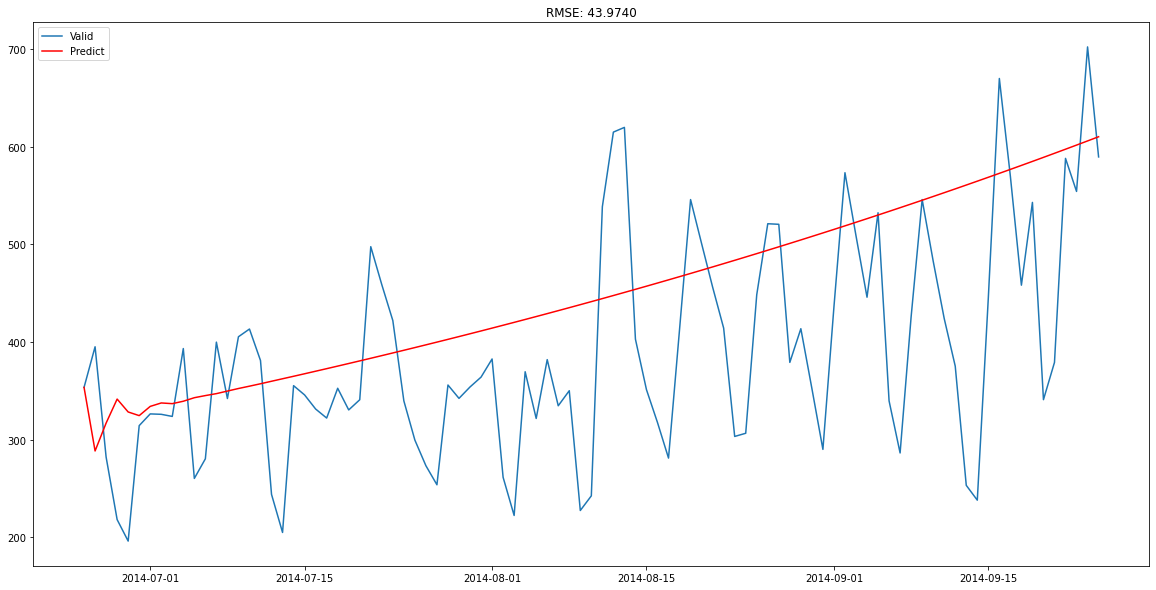

In [169]:
AR_predict=result_AR.predict(start='2014-06-25', end='2014-09-25') # store the predicted result
AR_predict=AR_predict.cumsum().shift().fillna(0)
# change the scale of the model to original scale
AR_predict1=pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0],index=valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict=np.exp(AR_predict1)

plt.plot(valid['Count'],label='Valid')
plt.plot(AR_predict, color='red', label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]))
plt.show()

## MA Model
The moving average model specifies that the output varible depends linearly on he current and various past values of a stochastic (imperfectly predictable) term.

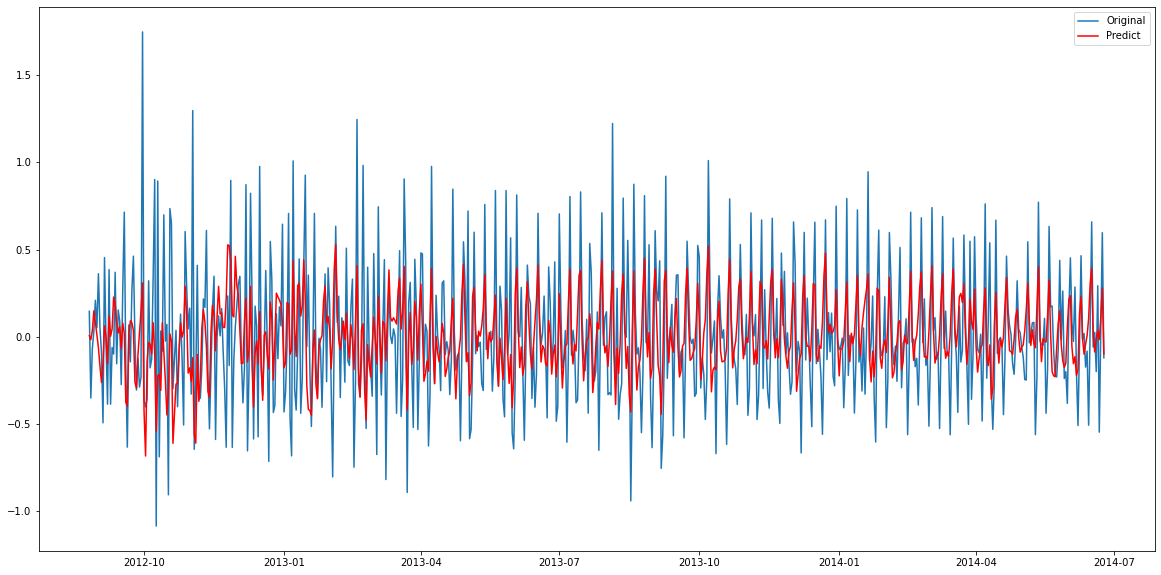

In [170]:
model=ARIMA(Train_log, order=(0,1,2)) # the p value is 0 since it's just the MA model
result_MA=model.fit(disp=-1)
plt.plot(Train_log_diff.dropna(), label='Original')
plt.plot(result_MA.fittedvalues, color='red', label='Predict')
plt.legend(loc='best')
plt.show()

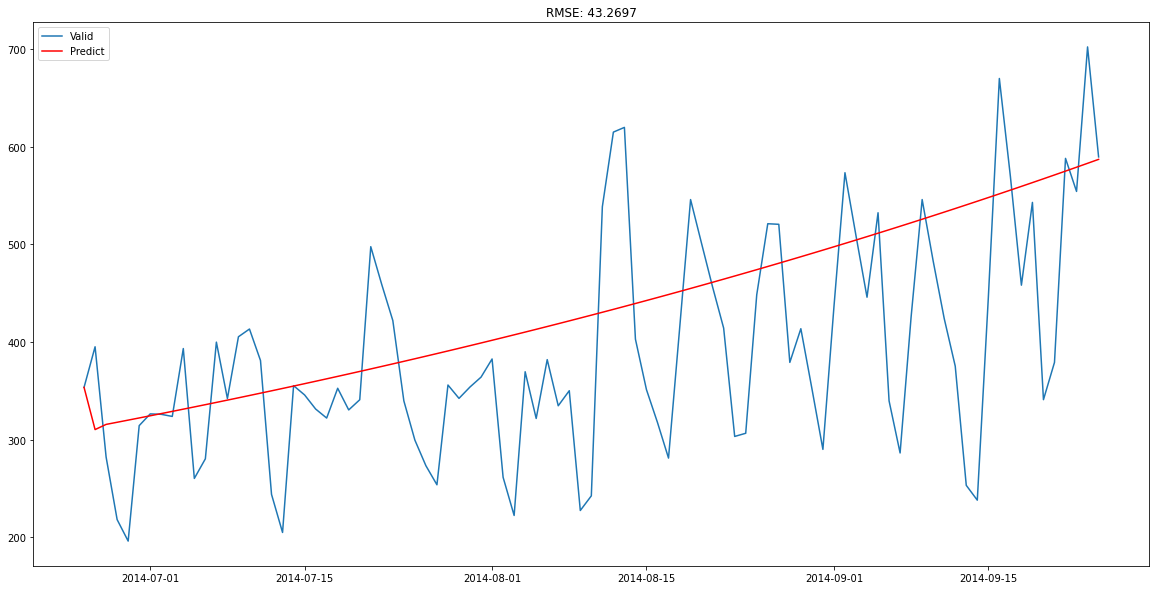

In [171]:
MA_predict=result_MA.predict(start='2014-06-25', end='2014-09-25') # store the predicted result
MA_predict=MA_predict.cumsum().shift().fillna(0)
# change the scale of the model to original scale
MA_predict1=pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0],index=valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict=np.exp(MA_predict1)

plt.plot(valid['Count'],label='Valid')
plt.plot(MA_predict, color='red', label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

## Combined Model

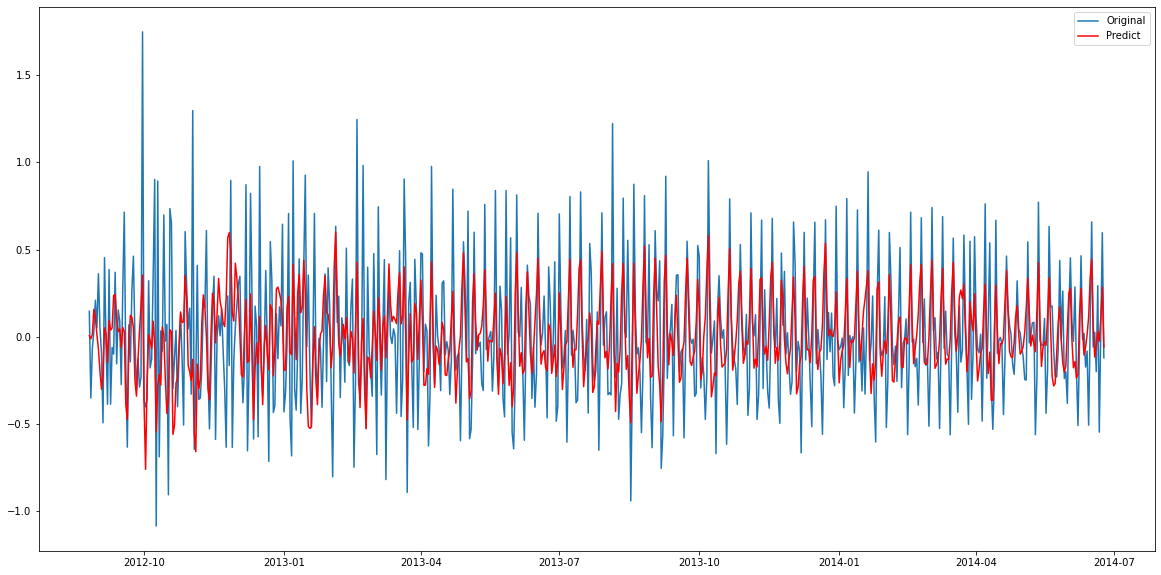

In [172]:
model=ARIMA(Train_log, order=(2,1,2))
result_ARIMA=model.fit(disp=-1)
plt.plot(Train_log_diff.dropna(), label='Original')
plt.plot(result_ARIMA.fittedvalues, color='red', label='Predict')
plt.legend(loc='best')
plt.show()

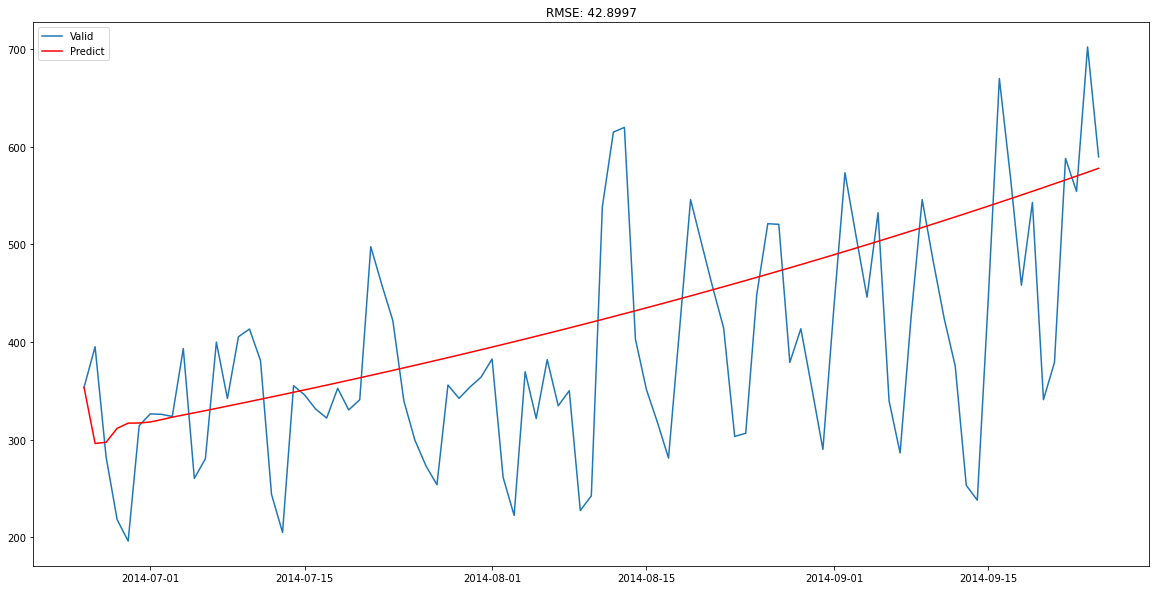

In [173]:
ARIMA_predict=result_ARIMA.predict(start='2014-06-25', end='2014-09-25') # store the predicted result
ARIMA_predict=ARIMA_predict.cumsum().shift().fillna(0)
# change the scale of the model to original scale
ARIMA_predict1=pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0],index=valid.index)
ARIMA_predict1=ARIMA_predict1.add(ARIMA_predict,fill_value=0)
ARIMA_predict=np.exp(ARIMA_predict1)

plt.plot(valid['Count'],label='Valid')
plt.plot(ARIMA_predict, color='red', label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(ARIMA_predict, valid['Count']))/valid.shape[0]))
plt.show()

## SARIMAX model on Daily Time Series
- SARIMAX model takes into account the seasonality of the time series
- Order in the model represents the order of the autoregressive model (number of time lags), the degree of differencing (number of the times the data have had past values substracted) and the order of moving average model
- Seasonal order represents the order of the seasonal component of the model for the AR parameters, differences, MA parameters, and preiodicity
- In our case the periodicity is 7 since it is daily time series and will repeat after every 7 days

In [174]:
import statsmodels.api as sm

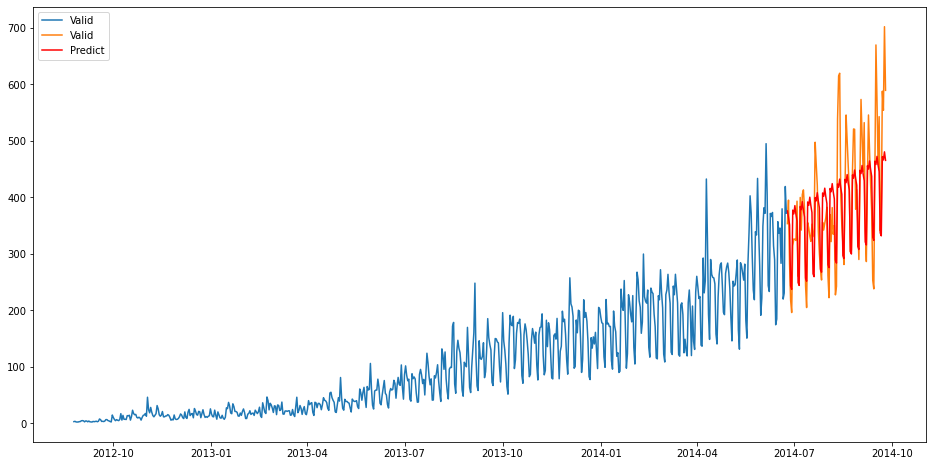

In [189]:
y_hat_avg=valid.copy()
fit1=sm.tsa.statespace.SARIMAX(Train.Count, order=(2,1,4), seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SERIMA']=fit1.predict(start="2014-6-25", end="2014-9-25",dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Valid')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['SERIMA'], color='red', label='Predict')
plt.legend(loc='best')
plt.show()

In [190]:
predict=fit1.predict(start="2014-9-25", end="2015-4-26",dynamic=True)

- These are the daily predictions and we need hourly predictions. So, we will distribute this daily prediction into hourly counts. To do so, we will take the ratio of hourly distribution of passenger count from train data and then we will distribute the predictions in the same ratio.

In [191]:
test['prediction']=predict
# merge test and test_original on day, month and year
merge=pd.merge(test,test_original, on=('day', 'month', 'year'), how='left')
merge['Hour']=merge['Hour_y']


In [192]:
merge=merge.drop(['year','month', 'Datetime', 'Hour_x', 'Hour_y'],axis=1)
prediction=pd.merge(merge,temp2,on='Hour' ,how='left')

In [194]:
# converting the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [202]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day','Hour','ratio','prediction','ID_x','ID_y','Hour.1'], axis=1)

In [ ]:
# converting the final submission to csv format
pd.DataFrame(submission, column=['ID','Count']).to_csv('SARIMAX.csv')

In [221]:
submission['Count'].sum()

2833118.5995435882

## Conclusion
After calculating the total sum for the predicted count of passenger for the next 7 months, we got a total passenger count of 2,833,119 which is a quite decent amount of passenger count for 7 months. It is reasonable to consider investing in the JetRail given that it generates decent amount of passenger in the future. The final decision could be made along with qualitative factors regarding the market trend of airline industry, customer preference, and competition advantage of JetRail.